### Stage 2. Outcomes.csv

The Outcomes.csv file contains processed measurement data related to the impact of meditation programs on psychological and physiological well-being. This dataset is crucial for assessing changes in various mental health indicators over time. It includes the following columns:

- **study_id** – A unique identifier for each study, linking the data to specific research trials. 
- **o_short** – A short code representing the measurement scale used in the study (e.g., HADS, PANAS). 
- **o_full** – The full name of the measurement scale, providing a clearer understanding of what is being assessed. 
- **o_min** – The minimum possible value for the given scale, helping to contextualize the range of observed data. 
- **o_max** – The maximum possible value for the scale, used to determine the relative magnitude of recorded measurements. 
- **o_mean** – The expected average score for the measurement scale in a general population, serving as a reference for comparison.

This dataset is integral to analyzing the effectiveness of various meditation programs in altering stress levels, anxiety, depression, and other psychological factors. By using standardized scales, it allows for consistent comparisons across different studies.

### Exploring the Outcomes

Now, let’s see what is Otcomes about! We’ll start by downloading `Outcomes.csv`, which will give us the information how the impact of meditation programs was measured. This information will bring us imagination about criterias we can use in the fufure for compare the impact. For be sure we understood the meaning of data columns right, we will join out Metadata file, downloading it first.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [8]:
outcomes_prepared_df=pd.read_csv(r'C:\Users\User\OneDrive\Documents\NEW_JOB\Pet Projects\Meditation_Stress_Project\Cleaned data\Outcomes_prepared.csv', encoding='utf-8-sig', delimiter=',', on_bad_lines='skip')

In [9]:
code_book_df=pd.read_csv(r'C:\Users\User\OneDrive\Documents\NEW_JOB\Pet Projects\Meditation_Stress_Project\Cleaned data\Code_Book.csv', encoding='utf-8-sig', delimiter=',', on_bad_lines='skip')

## Mapping the Unknown: Understanding the `Outcomes_prepared` Dataset  

Before we can unlock the power of our dataset, we need a **map**—a way to understand what each column represents. That’s where our **Code Book** steps in, acting like a translator between raw data and meaningful insights.  

To make sense of it all, we set out to **build a structured summary** of every column in the `Outcomes_prepared` dataset. Let’s take a look at how we bring order to the chaos.

---

### Step 1: Setting Up the Exploration  
Think of each column as a unique entity, holding valuable but often cryptic information. Our goal is to **decode its meaning**, ensuring we interpret it correctly in the later stages of analysis.  

To do this, we create an **empty list**—a space where we’ll collect descriptions, data types, and formatting details for each column.  

```python
# Creating an empty list to store column details
columns_summary = []

### Step 2: Consulting the Code Book
With our list ready, we begin our journey through the dataset, examining each column one by one:

What does this column represent?

We search the Code Book for a description, allowing us to grasp its purpose and significance.
What type of data does it contain?

Whether it's numeric, categorical, or text, knowing the data type helps us determine the right tools for processing and visualization.
What does a typical value look like?

If available, we retrieve an example from the Code Book, giving us a tangible reference for what kind of values we’re dealing with.
If any of these details are missing, we note them as unknown—marking areas that may require further investigation.

### Step 3: Transforming Chaos into Clarity
Once we’ve gathered all the details, it’s time to organize them into a DataFrame—our structured cheat sheet for the dataset. This table provides an at-a-glance summary, making it easier to navigate, clean, and analyze the data.

Finally, we print our completed summary, unveiling the hidden structure behind Outcomes_prepared. With this knowledge in hand, we are now ready to explore deeper, confident that we understand the foundation of our dataset.

This is just the beginning—next, we’ll leverage this newfound clarity to uncover meaningful insights and trends! 🚀

In [10]:
# Creating a DataFrame summarizing the columns of 'Outcomes_prepared' dataset using the code book
columns_summary = []

for column in outcomes_prepared_df.columns:
    # Look for the field description in the code book
    description = code_book_df[code_book_df['Field Name'] == column]['Description'].values
    column_type = code_book_df[code_book_df['Field Name'] == column]['Type'].values
    format_example = code_book_df[code_book_df['Field Name'] == column]['Example'].values

    # Add the column summary to the list
    columns_summary.append({
        'Column Name': column,
        'Description': description[0] if len(description) > 0 else 'No description available',
        'Type': column_type[0] if len(column_type) > 0 else 'Unknown'
    })

# Convert the summary to a DataFrame
columns_summary_df = pd.DataFrame(columns_summary)

# Display the summary table
print(columns_summary_df)

  Column Name                      Description     Type
0    study_id        uniquely identifies study  numeric
1      o_full  full name of the outcome measue   string
2       o_max                    maximum score  numeric
3       o_min                    minimun score  numeric
4      o_mean          meaning of a high score   string


## Examining the `Outcomes_prepared` Dataset: Structure and Statistics  

Before proceeding with analysis, we need to understand the **structure** of our dataset, check for **missing values**, and identify any anomalies in the numerical fields. The following steps help us achieve this:

---

### 1. Displaying the Dataset
We print a portion of the dataset to get a **quick look** at its contents. Here’s what we find:
- Each row corresponds to a **study (`study_id`)**, with associated **measurement scales (`o_full`)**.
- The dataset includes **maximum (`o_max`) and minimum (`o_min`) values** for each scale.
- `o_mean` provides an **interpretation of scale results** (e.g., *higher levels of anxiety*).

```python
print(outcomes_prepared_df.head())

In [11]:
print(outcomes_prepared_df.head(10))

   study_id                          o_full  o_max  o_min  \
0        13          Beck Anxiety Inventory   63.0    0.0   
1        20          Beck Anxiety Inventory   63.0    0.0   
2        37          Beck Anxiety Inventory   63.0    0.0   
3        40          Beck Anxiety Inventory   63.0    0.0   
4        51          Beck Anxiety Inventory   63.0    0.0   
5        54          Beck Anxiety Inventory   63.0    0.0   
6        69          Beck Anxiety Inventory   63.0    0.0   
7        78          Beck Anxiety Inventory   63.0    0.0   
8        78    Beck Depression Inventory II   63.0    0.0   
9         1  Beck's Depression Inventory II   63.0    0.0   

                                 o_mean  
0              higher levels of anxiety  
1              higher levels of anxiety  
2              higher levels of anxiety  
3              higher levels of anxiety  
4              higher levels of anxiety  
5              higher levels of anxiety  
6              higher levels of an

2. Checking Dataset Structure
We use .info() to inspect:

Total number of rows and columns.
Data types of each column.
Count of non-null values, revealing potential missing data.

In [19]:
print(outcomes_prepared_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   study_id  164 non-null    int64  
 1   o_full    164 non-null    object 
 2   o_max     151 non-null    float64
 3   o_min     151 non-null    float64
 4   o_mean    155 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 6.5+ KB
None


📌 Key Observations:

The dataset contains 164 rows and 5 columns.
o_max and o_min have missing values (151 non-null values out of 164).
o_mean also has missing entries (155 non-null values).
Data types include:
int64 (study ID),
float64 (numeric scale values),
object (text descriptions).

3. Descriptive Statistics
To understand the distribution of numerical values, we use .describe():

📊 Insights from Descriptive Statistics:

study_id ranges from 1 to 78, confirming diverse studies in our dataset.
Unexpected negative values in o_max and o_min suggest potential data issues.
The maximum o_max value is 200, while most values cluster around 50–63.

In [13]:
print(outcomes_prepared_df.describe())

         study_id       o_max       o_min
count  164.000000  151.000000  151.000000
mean    41.024390   49.576159    2.245033
std     22.357099   28.588445   11.461220
min      1.000000  -24.000000  -32.000000
25%     20.000000   35.000000    0.000000
50%     42.500000   50.000000    0.000000
75%     61.000000   63.000000    0.000000
max     78.000000  200.000000  124.000000


## Standardizing Scale Names: Ensuring Data Consistency  

In order to maintain **data consistency** and prevent errors in analysis, we need to ensure that measurement scale names (`o_full`) are correctly standardized. This process involves:

1. **Checking for inconsistencies** in naming.
2. **Creating a mapping dictionary** to correct variations.
3. **Applying standardization** across the dataset.

---

### **1. Extracting Unique Scale Names**
Before making any corrections, we first **inspect all unique values** in the `o_full` column to identify inconsistencies.


In [14]:
# Research all unique values of 'o_full' and 'o_short' columns to check if they were written correctly
o_full_unique = outcomes_prepared_df['o_full'].unique()


# Display unique values for 'o_full' and 'o_short'
print("Unique values in 'o_full':")
print(o_full_unique)

Unique values in 'o_full':
['Beck Anxiety Inventory' 'Beck Depression Inventory II'
 "Beck's Depression Inventory II" 'Brief Symptom Inventory-18 Anxiety'
 'Brief Symtom Inventory-18 Depression'
 'Calgary Symptoms of Stress Inventory-depression'
 'Center for epidemiologic studies Depression Scale'
 'Chinese Version of Depression' 'Depression'
 'Depression and Anxiety Stress Scale-21 Depression'
 'Depression Anxeity and Stress Scale - 21 Stress'
 'Depression Anxiety and Stress Scale - 21 Anxiety'
 'Depression Anxiety and Stress Scale-21- Anxiety &Depression'
 'Depression Anxiety and Stress Scale-21- Depression'
 'Functional Assessment of Cancer Therapy-emotional well-being'
 'Functional Assessment of Cancer Therapy-General '
 'Generalized Anxiety Disorder-7' 'Genralized Anxiety Disorder Scale - 2'
 'Hospital anxiety and depression scale - total'
 'Hospital Anxiety and Depression Scale - Anxiety '
 'Hospital Anxiety and Depression Scale - Depression'
 'Hospital Anxiety and Depression Sca

📌 Why is this important?

Identifies misspellings, variations, or formatting issues.
Helps us map incorrect names to standard ones.
Ensures that the same measurement scale is not counted separately due to inconsistent naming.

### **2. Creating a Standardization Dictionary
Once we have identified naming inconsistencies, we create a dictionary (o_full_standardization) to map incorrect names to their standardized versions.

📌 Why do we need this?

Fixes spelling mistakes (Symtom → Symptom, Perveived → Perceived).
Ensures consistent casing and formatting.
Aligns terminology (patient reported outcomes measurement information system → Patient Reported Outcomes Measurement Information System).

In [15]:
# Create dictionaries to standardize names for 'o_full' 
o_full_standardization = {
    "Beck's Depression Inventory II": 'Beck Depression Inventory II',
    'Brief Symtom Inventory-18 Depression': 'Brief Symptom Inventory-18 Depression',
    'Calgary Symptoms of Stress Inventory-depression': 'Calgary Symptoms of Stress Inventory - Depression',
    'Center for epidemiologic studies Depression Scale': 'Center for Epidemiologic Studies Depression Scale',
    'Depression Anxeity and Stress Scale - 21 Stress': 'Depression Anxiety and Stress Scale - 21 Stress',
    'Genralized Anxiety Disorder Scale - 2': 'Generalized Anxiety Disorder-2',
    'Patient Health Questionnaie-8': 'Patient Health Questionnaire-8',
    'patient reported outcomes measurement information system - anxiety (7 items)': 'Patient Reported Outcomes Measurement Information System - Anxiety (7 items)',
    'Perveived Stress Questionnaire': 'Perceived Stress Questionnaire',
    'Positive and Negative Affect Scale - Negative': 'Positive and Negative Affect Schedule - Negative',
    'Positive and Negative Affect Scale - Positive ': 'Positive and Negative Affect Schedule - Positive',
    'profile of mood states - tension': 'Profile of Mood States - Tension',
    'profile of mood states-short form': 'Profile of Mood States - Short Form',
    'psychological well-being scales': 'Psychological Well-Being Scales'
}

### **3 Applying the Standardization
Now that we have our mapping, we can apply these corrections to our dataset to ensure every scale follows the same format.

By taking these steps, we improve data integrity, remove redundancy, and create a clean dataset for accurate analysis. 🚀

## Understanding the Frequency of Measurement Scales  

Now that we have cleaned and standardized the scale names, it's time to explore **how often each measurement scale appears in the dataset**. This step helps us identify which scales were most commonly used across different studies.

---

### **Step 1: Counting the Occurrences of Each Scale**  
To visualize the distribution of measurement scales, we first **calculate the frequency** of each unique scale in the dataset.  


In [16]:
scale_counts = outcomes_prepared_df['o_full'].value_counts()


🔍 Why is this important?

Helps us identify the most frequently used scales, showing which psychological factors were prioritized.
Reveals whether any scales were underrepresented, which could impact analysis.
Ensures that we focus on high-impact scales when interpreting results.


 
### **Step 2: Creating a Bar Chart**
Once we have the counts, we visualize them using a bar chart to make the distribution easier to interpret.

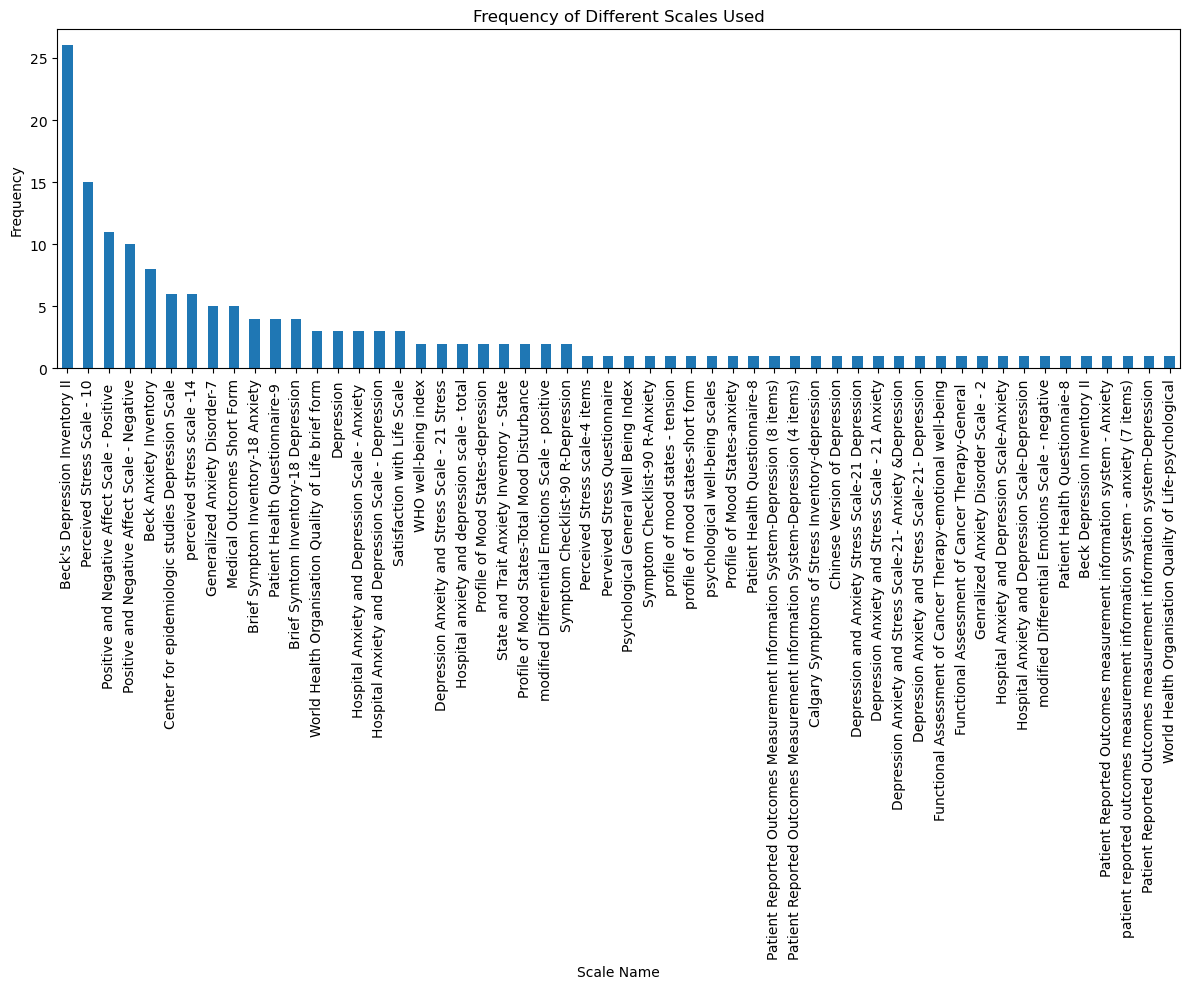

In [17]:
plt.figure(figsize=(12, 10))
scale_counts.plot(kind='bar')
plt.title('Frequency of Different Scales Used')
plt.xlabel('Scale Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 📊 Key Findings from Scale Frequency Analysis

1. **Most Frequently Used Scales**  
   - Certain psychological measurement scales appear significantly more often than others.  
   - This highlights a priority in assessing specific indicators such as stress, anxiety, and depression levels.  

2. **Top 10 Most Frequently Used Scales**  

   - Beck's Depression Inventory II  
   - Perceived Stress Scale - 10  
   - Positive and Negative Affect Scale - Positive  
   - Positive and Negative Affect Scale - Negative  
   - Beck Anxiety Inventory  
   - Center for Epidemiologic Studies Depression Scale  
   - Perceived Stress Scale - 14  
   - Generalized Anxiety Disorder-7  
   - Medical Outcomes Short Form  
   - Brief Symptom Inventory-18 Anxiety  

3. **Multi-Scale Studies**  
   - Many studies use **multiple scales** simultaneously.  
   - This allows for a comprehensive assessment but complicates the process of summarizing results.  
   - To improve analysis, it is important to identify **which scales are commonly used together** and whether there are correlations between them.

4. **Different Scale Directions**  
   - Some scales measure **a reduction in negative states** (e.g., decreased stress or anxiety).  
   - Others evaluate **a positive impact** (e.g., improved quality of life or mood enhancement).  
   - This makes calculating means and comparing results more challenging.  
   - To ensure accuracy, scales should be **grouped by direction**:  
     - **Negative impact scales** (where higher values indicate a worse state).  
     - **Positive impact scales** (where higher values indicate improvement).  

5. **How Should We Structure the Analysis?**  
   - We can organize the analysis **by scales** or **by research groups**.  
   - **A scale-based approach** helps compare the effects of meditation on different psychological aspects.  
   - **A study-group-based approach** helps analyze trends among participants with **specific diagnoses**, as each group has its own characteristics.  
   - It is essential to choose the strategy that provides **the most meaningful conclusions**.

6. **Next Steps**  
   - Separate scales by their direction (positive/negative impact).  
   - Decide whether to structure the analysis **by scales or by study groups (diagnoses)**.  
   - Compare the effects of meditation across different categories to identify meaningful patterns.

## 🎯 Percentage of Studies Using Multiple Scales

### 🔍 Why is this important?
- Many studies assess multiple psychological factors rather than relying on a single scale.
- Understanding how often multiple scales are used helps us **evaluate data complexity** and **interpret results correctly**.
- If studies combine **scales with different directional meanings**, we need to **carefully normalize data** before analysis.

### 📊 Key Insights:
- A significant portion of studies **use more than one scale**.
- Some studies incorporate **5 or more scales**, allowing for a broader psychological assessment.
- This confirms that we need to **handle multi-scale studies carefully** when analyzing meditation’s impact.

### 📌 Next Steps:
- Merge this dataset with the study file to determine **correlations between diagnosis names and scale usage**.
- Explore **which scales are most commonly used for specific diagnoses**.

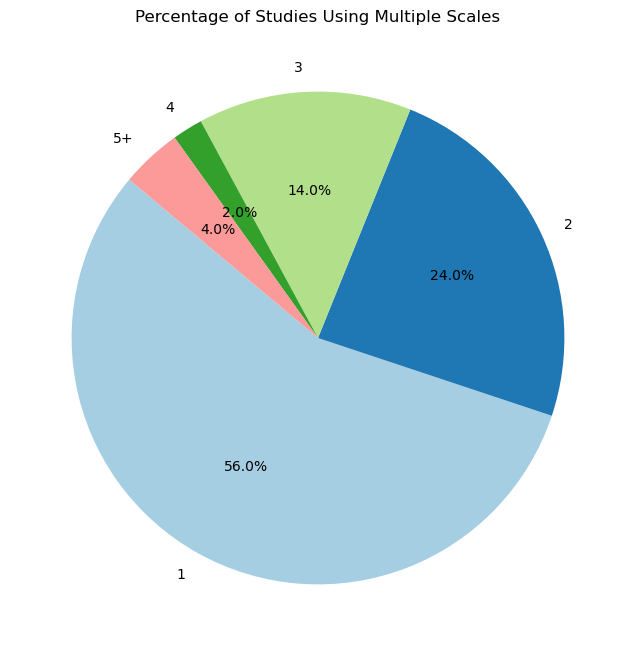

In [18]:
# Count the number of scales used per study
scales_per_study = outcomes_prepared_df.groupby("study_id")["o_full"].count()

# Dynamically define bins based on actual max number of scales
max_scales = scales_per_study.max()

# Define bin thresholds dynamically
bins = [1, 2, 3, 4, 5]  # Always include the lower range
if max_scales >= 10:
    bins.append(10)
if max_scales >= 20:
    bins.append(20)
bins.append(max_scales + 1)  # Ensure the last bin is greater than the max value

# Define labels accordingly
labels = [str(i) for i in bins[:-2]] + [f"{bins[-2]}+"]

# Apply binning and count occurrences
scales_distribution = pd.cut(scales_per_study, bins=bins, labels=labels, right=True).value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(scales_distribution, labels=scales_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Percentage of Studies Using Multiple Scales")
plt.show()